# ƒê·ªí √ÅN TH·ª∞C H√ÄNH
# CSC17104 ‚Äì L·∫¨P TR√åNH CHO KHOA H·ªåC D·ªÆ LI·ªÜU

Gi·∫£ng vi√™n: B√πi Ti·∫øn L√™n

Th√¥ng tin th√†nh vi√™n:
1. Nguy·ªÖn VƒÉn Tu·∫•n ƒê·∫°t 19120472
2. Phan Xu√¢n Ho√†i 20120481
3. Lu√¢n M√£ Kh∆∞∆°ng 20120515
4. 

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme()

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

## A. Thu th·∫≠p d·ªØ li·ªáu
- T√™n d·ªØ li·ªáu: HR Analytics: Job Change of Data Scientists
- Ngu·ªìn l·∫•y d·ªØ li·ªáu: kaggle
- Link d·ªØ li·ªáu: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
- License: CC0: Public Domain
- M√¥ t·∫£ v·ªÅ d·ªØ li·ªáu: d·ªØ li·ªáu g·ªìm t·∫≠p train v√† t·∫≠p test. Trong ƒë·ªì √°n n√†y, nh√≥m s·∫Ω s·ª≠ d·ª•ng t·∫≠p train.
            + D·ªØ li·ªáu g·ªìm 14 c·ªôt v√† 19158 d√≤ng.

In [2]:
df = pd.read_csv('aug_train.csv', encoding='utf-8')
df.shape

(19158, 14)

In [3]:
df.head(10)

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   
5        21651  city_176                   0.764    NaN   
6        28806  city_160                   0.920   Male   
7          402   city_46                   0.762   Male   
8        27107  city_103                   0.920   Male   
9          699  city_103                   0.920    NaN   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   
5  Has relevent experience    Part time course        Graduate   
6  Has relevent experience       no_enrollment     High School   
7  Has relevent experience       no_enrollment        Graduate   
8  Has relevent experience       no_enrollment        Graduate   
9  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   
5             STEM         11          NaN             NaN            1   
6              NaN          5        50-99  Funded Startup            1   
7             STEM         13          <10         Pvt Ltd           >4   
8             STEM          7        50-99         Pvt Ltd            1   
9             STEM         17       10000+         Pvt Ltd           >4   

   training_hours  target  
0              36       1  
1              47       0  
2              83       0  
3              52       1  
4               8       0  
5              24       1  
6              24       0  
7              18       1  
8              46       1  
9             123       0

## B. Kh√°m ph√° d·ªØ li·ªáu (th∆∞·ªùng ƒëan xen v·ªõi pha ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu)

### 1.M·ªói d√≤ng c√≥ √Ω nghƒ©a g√¨? C√≥ v·∫•n ƒë·ªÅ v·ªõi c√°c d√≤ng c√≥ √Ω nghƒ©a kh√°c nhau kh√¥ng?

* M·ªói d√≤ng l√† th√¥ng tin c·ªßa t·ª´ng ·ª©ng vi√™n, trong ƒë√≥ m·ªói √¥ c·ªßa d√≤ng l√† d·ªØ li·ªáu t∆∞∆°ng ·ª©ng v·ªõi c·ªôt c·ªßa √¥ ƒë√≥
* Kh√¥ng c√≥ v·∫•n ƒë·ªÅ c√°c d√≤ng c√≥ √Ω nghƒ©a kh√°c nhau

### 1.1 Ki·ªÉm tra c√°c d√≤ng c√≥ b·ªã tr√πng l·∫∑p hay kh√¥ng?

In [4]:
have_duplicated_rows = np.any(df.duplicated())
have_duplicated_rows

False

C√°c d√≤ng kh√¥ng b·ªã tr√πng l·∫∑p.

### 2.M·ªói c·ªôt c√≥ √Ω nghƒ©a g√¨?
            
            - enrollee_id : ID v·ªõi t·ª´ng ·ª©ng vi√™n

            - city: M√£ th√†nh ph·ªë

            - city_ development _index : Ch·ªâ s·ªë ph√°t tri·ªÉn c·ªßa th√†nh ph·ªë (theo t·ª∑ l·ªá)

            - gender: Gi·ªõi t√≠nh

            - relevent_experience: Kinh nghi·ªám li√™n quan c·ªßa ·ª©ng vi√™n

            - enrolled_university: Lo·∫°i kh√≥a h·ªçc ƒë·∫°i h·ªçc ƒë√£ ƒëƒÉng k√Ω n·∫øu c√≥

            - education_level: Tr√¨nh ƒë·ªô h·ªçc v·∫•n

            - major_discipline: Ng√†nh h·ªçc ch√≠nh

            - experience: Kinh nghi·ªám (t√≠nh theo nƒÉm)

            - company_size: S·ªë l∆∞·ª£ng nh√¢n vi√™n trong c√¥ng ty c·ªßa ng∆∞·ªùi s·ª≠ d·ª•ng lao ƒë·ªông hi·ªán t·∫°i

            - company_type : Lo·∫°i ch·ªß lao ƒë·ªông hi·ªán t·∫°i

            - last_new_job: S·ª± kh√°c bi·ªát v·ªÅ s·ªë nƒÉm gi·ªØa c√¥ng vi·ªác tr∆∞·ªõc ƒë√¢y v√† c√¥ng vi·ªác hi·ªán t·∫°i

            - training_hours: Th·ªùi gian ho√†n th√†nh hu·∫•n luy·ªán

            - target: 0 ‚Äì Kh√¥ng nh·∫£y vi·ªác, 1 ‚Äì Nh·∫£y vi·ªác

### 3.M·ªói c·ªôt hi·ªán ƒëang c√≥ ki·ªÉu d·ªØ li·ªáu g√¨? C√≥ c·ªôt n√†o c√≥ ki·ªÉu d·ªØ li·ªáu ch∆∞a ph√π h·ª£p ƒë·ªÉ c√≥ th·ªÉ x·ª≠ l√Ω ti·∫øp hay kh√¥ng?

In [5]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [6]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

V√¨ trong feature experience c√≥ c√°c d·ªØ li·ªáu nh∆∞ <1, 1, 2, ..., 20, >20 n√™n ta s·∫Ω chuy·ªÉn d·ªØ li·ªáu sang d·∫°ng c√°c kho·∫£ng nh∆∞ (0,1),
(1,5), (6,10), (11,15), (16,20), (21,30)

In [7]:
def trans_experience(experience):
    if isinstance(experience, float):
        return np.nan
    if experience == '<1':
        return (0,1)
    if experience == '>20':
        return (21,30)
    cei = math.ceil(int(experience)/5)
    return (cei*5 - 4, cei*5)

df['experience'] = df['experience'].apply(trans_experience)
df['experience']

0        (21, 30)
1        (11, 15)
2          (1, 5)
3          (0, 1)
4        (21, 30)
           ...   
19153    (11, 15)
19154    (11, 15)
19155    (21, 30)
19156      (0, 1)
19157      (1, 5)
Name: experience, Length: 19158, dtype: object

### 4.V·ªõi m·ªói c·ªôt, c√°c gi√° tr·ªã ƒë∆∞·ª£c ph√¢n b·ªë nh∆∞ th·∫ø n√†o?

#### 4.1 V·ªõi c√°c c·ªôt c√≥ gi√° tr·ªã d·∫°ng s·ªë

**C√°c c·ªôt d·∫°ng s·ªë:** _'enrollee_id', 'city_development_index', 'training_hours', 'target'_ 

DataFrame `summary_df` b√™n d∆∞·ªõi ch·ª©a th√¥ng tin ph√¢n b·ªë gi√° tr·ªã c·ªßa c√°c c·ªôt tr√™n:
- T√™n c·ªßa c√°c c·ªôt l√† t√™n c·ªßa c√°c c·ªôt s·ªë trong `df`
- T√™n c·ªßa c√°c d√≤ng c√≥ √Ω nghƒ©a l√†: 
 + `"missing_ratio"`: t·ªâ l·ªá ph·∫ßn trƒÉm c√°c gi√° tr·ªã thi·∫øu
 + `"count"`: s·ªë l∆∞·ª£ng gi√° tr·ªã 
 + `"mean"`: gi√° tr·ªã trung b√¨nh
 + `"std"`: ƒë·ªô l·ªách chu·∫©n
 + `"min"`: gi√° tr·ªã nh·ªè nh·∫•t
 + `"25%"`: gi√° tr·ªã ph√¢n v·ªã 25%
 + `"50%"`: gi√° tr·ªã ph√¢n v·ªã 50%
 + `"75%"`: gi√° tr·ªã ph√¢n v·ªã 75%
 + `"max"`: gi√° tr·ªã l·ªõn nh·∫•t

In [8]:
summary_df = df.describe().round(1)
missing_ratio = pd.DataFrame(df[['enrollee_id', 'city_development_index', 'training_hours', 'target']].isna().sum() * 100/ len(df)).T.round(1)
missing_ratio = missing_ratio.set_axis(['missing_ratio'])
summary_df = pd.concat([missing_ratio, summary_df])
summary_df

enrollee_id  city_development_index  training_hours   target
missing_ratio          0.0                     0.0             0.0      0.0
count              19158.0                 19158.0         19158.0  19158.0
mean               16875.4                     0.8            65.4      0.2
std                 9616.3                     0.1            60.1      0.4
min                    1.0                     0.4             1.0      0.0
25%                 8554.2                     0.7            23.0      0.0
50%                16982.5                     0.9            47.0      0.0
75%                25169.8                     0.9            88.0      0.0
max                33380.0                     0.9           336.0      1.0

Theo quan s√°t ·ªü tr√™n, ta th·∫•y c√°c c·ªôt c√≥ gi√° tr·ªã s·ªë kh√¥ng c√≥ gi√° tr·ªã thi·∫øu. M·ªçi th·ª© trong c√≥ v·∫ª ·ªïn.

### 4.2 V·ªõi c√°c c·ªôt c√≥ gi√° tr·ªã categorical

C√°c gi√° tr·ªã s·∫Ω t√≠nh:
- T·ªâ l·ªá % (t·ª´ 0 ƒë·∫øn 100) c√°c gi√° tr·ªã thi·∫øu 
- S·ªë l∆∞·ª£ng c√°c gi√° tr·ªã (c√°c gi√° tr·ªã ·ªü ƒë√¢y l√† c√°c gi√° tr·ªã kh√°c nhau v√† ta kh√¥ng x√©t gi√° tr·ªã thi·∫øu)
- T·ªâ l·ªá % (t·ª´ 0 ƒë·∫øn 100) c·ªßa m·ªói gi√° tr·ªã ƒë∆∞·ª£c sort theo t·ªâ l·ªá % gi·∫£m d·∫ßn (ta kh√¥ng x√©t gi√° tr·ªã thi·∫øu, t·ªâ l·ªá l√† t·ªâ l·ªá so v·ªõi s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã kh√¥ng thi·∫øu)

In [9]:
def missing_ratio(x):
    return (x.isna().mean()*100)
def num_values(x):
    return len(x.dropna().value_counts())
def value_ratios(x):
    count_value =  x.dropna().value_counts().sort_values(ascending=False)
    return (count_value/count_value.sum()*100).round(1).to_dict()
cat_df_info = df.select_dtypes(include="object").agg(func=[missing_ratio, num_values, value_ratios])
cat_df_info

city  \
missing_ratio                                                0.0   
num_values                                                   123   
value_ratios   {'city_103': 22.7, 'city_21': 14.1, 'city_16':...   

                                                    gender  \
missing_ratio                                     23.53064   
num_values                                               3   
value_ratios   {'Male': 90.2, 'Female': 8.5, 'Other': 1.3}   

                                             relevent_experience  \
missing_ratio                                                0.0   
num_values                                                     2   
value_ratios   {'Has relevent experience': 72.0, 'No relevent...   

                                             enrolled_university  \
missing_ratio                                           2.014824   
num_values                                                     3   
value_ratios   {'no_enrollment': 73.6, 'Full time course': 20...   

                                                 education_level  \
missing_ratio                                           2.401086   
num_values                                                     5   
value_ratios   {'Graduate': 62.0, 'Masters': 23.3, 'High Scho...   

                                                major_discipline  \
missing_ratio                                          14.683161   
num_values                                                     6   
value_ratios   {'STEM': 88.7, 'Humanities': 4.1, 'Other': 2.3...   

                                                      experience  \
missing_ratio                                           0.339284   
num_values                                                     6   
value_ratios   {(1, 5): 30.7, (6, 10): 26.2, (21, 30): 17.2, ...   

                                                    company_size  \
missing_ratio                                          30.994885   
num_values                                                     8   
value_ratios   {'50-99': 23.3, '100-500': 19.4, '10000+': 15....   

                                                    company_type  \
missing_ratio                                          32.049274   
num_values                                                     6   
value_ratios   {'Pvt Ltd': 75.4, 'Funded Startup': 7.7, 'Publ...   

                                                    last_new_job  
missing_ratio                                           2.207955  
num_values                                                     6  
value_ratios   {'1': 42.9, '>4': 17.6, '2': 15.5, 'never': 13...

C√°c c·ªôt gender, company_size, company_type ƒë·ªÅu c√≥ s·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu kh√° l·ªõn, tr√™n 22%. C√°c s·ªë li·ªáu kh√°c trong c√≥ v·∫ª ·ªïn

### 5. Ti·ªÅn x·ª≠ l√≠ d·ªØ li·ªáu

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

S·ªë l∆∞·ª£ng gi√° tr·ªã b·ªã thi·∫øu.

In [11]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Ta th·∫•y c√≥ kh√° nhi·ªÅu gi√° tr·ªã b·ªã thi·∫øu v√† ƒëa s·ªë ƒë·ªÅu l√† categorical. V√¨ v·∫≠y, ta s·∫Ω x√≥a c√°c d√≤ng b·ªã thi·∫øu.

In [12]:
mask = df['last_new_job'] == 'never'
df.loc[mask,["company_size","company_type"]] = "None"
df.dropna(inplace=True)
df

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776    Male   
4              666  city_162                   0.767    Male   
7              402   city_46                   0.762    Male   
8            27107  city_103                   0.920    Male   
11           23853  city_103                   0.920    Male   
...            ...       ...                     ...     ...   
19147        21319   city_21                   0.624    Male   
19149          251  city_103                   0.920    Male   
19150        32313  city_160                   0.920  Female   
19152        29754  city_103                   0.920  Female   
19155        24576  city_103                   0.920    Male   

           relevent_experience enrolled_university education_level  \
1       No relevent experience       no_enrollment        Graduate   
4      Has relevent experience       no_enrollment         Masters   
7      Has relevent experience       no_enrollment        Graduate   
8      Has relevent experience       no_enrollment        Graduate   
11     Has relevent experience       no_enrollment        Graduate   
...                        ...                 ...             ...   
19147   No relevent experience    Full time course        Graduate   
19149  Has relevent experience       no_enrollment         Masters   
19150  Has relevent experience       no_enrollment        Graduate   
19152  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   

      major_discipline experience company_size    company_type last_new_job  \
1                 STEM   (11, 15)        50-99         Pvt Ltd           >4   
4                 STEM   (21, 30)        50-99  Funded Startup            4   
7                 STEM   (11, 15)          <10         Pvt Ltd           >4   
8                 STEM    (6, 10)        50-99         Pvt Ltd            1   
11                STEM     (1, 5)    5000-9999         Pvt Ltd            1   
...                ...        ...          ...             ...          ...   
19147             STEM     (1, 5)      100-500         Pvt Ltd            1   
19149             STEM    (6, 10)        50-99         Pvt Ltd            1   
19150             STEM    (6, 10)      100-500   Public Sector            3   
19152       Humanities    (6, 10)       Oct-49  Funded Startup            1   
19155             STEM   (21, 30)        50-99         Pvt Ltd            4   

       training_hours  target  
1                  47       0  
4                   8       0  
7                  18       1  
8                  46       1  
11                108       0  
...               ...     ...  
19147              52       1  
19149              36       1  
19150              23       0  
19152              25       0  
19155              44       0  

[9518 rows x 14 columns]

S·ªë l∆∞·ª£ng d√≤ng b·ªã thi·∫øu kh√° nhi·ªÅu, kho·∫£ng 1/2 c·ªßa d·ªØ li·ªáu.

## C. ƒê∆∞a ra c√°c c√¢u h·ªèi c√≥ √Ω nghƒ©a c·∫ßn tr·∫£ l·ªùi

### 1. T·ªâ l·ªá Data Scientists tr√™n 5 nƒÉm kinh nghi·ªám ƒëang t√¨m ki·∫øm c√¥ng vi·ªác m·ªõi trong Top 5 th√†nh ph·ªë ph√°t tri·ªÉn nh·∫•t?

L·ª£i √≠ch khi tr·∫£ l·ªùi ƒë∆∞·ª£c c√¢u h·ªèi:
- V·ªõi vai tr√≤ l√† doanh nghi·ªáp s·∫Ω bi·∫øt th√™m th√¥ng tin ƒë·ªÉ thay ƒë·ªïi ch√≠nh s√°ch ƒë√£i ng·ªô hay ƒëi·ªÅu ch·ªânh m√¥i tr∆∞·ªùng l√†m vi·ªác ƒë·ªÉ gi·ªØ ch√¢n c√°c nh√¢n vi√™n t√†i nƒÉng c·ªßa minh.
- Li·ªáu c√°c Data Scientists nhi·ªÅu nƒÉm kinh nghi·ªám c√≥ nhu c·∫ßu t√¨m ki·∫øm th√°ch th·ª©c m·ªõi cho b·∫£n th√¢n m√¨nh.
- Th·ªã tr∆∞·ªùng vi·ªác l√†m v·ªÅ Data Scientist ·ªü trong Top 5 th√†nh ph·ªë ph√°t tri·ªÉn nh·∫•t.

### 2. S·ªë nƒÉm kinh nghi·ªám v√† kinh nghi·ªám c√≥ li√™n quan ƒë·∫øn DS ·∫£nh h∆∞·ªüng th·∫ø n√†o ƒë·∫øn quy·∫øt ƒë·ªãnh c√≥ nh·∫£y vi·ªác kh√¥ng c·ªßa ng∆∞·ªùi tham gia ƒë√†o t·∫°o?

**L·ª£i √≠ch khi tr·∫£ l·ªùi ƒë∆∞·ª£c c√¢u h·ªèi:** Khi tr·∫£ l·ªùi ƒë∆∞·ª£c c√¢u h·ªèi c√¥ng ty c√≥ th·ªÉ ƒë√°nh gi√° ƒë∆∞·ª£c ƒë√¢u l√† m·ªôt ·ª©ng vi√™n ti·ªÅm nƒÉng mu·ªën l√†m vi·ªác cho c√¥ng ty d·ª±a v√†o s·ªë nƒÉm kinh nghi·ªám v√† kinh nghi·ªám c√≥ li√™n quan ƒë·∫øn DS c·ªßa ·ª©ng vi√™n ƒë·ªÉ 

### 3. C√≥ s·ª± ch√™nh l·ªách tr√¨nh ƒë·ªô h·ªçc v·∫•n gi·ªØa nam v√† n·ªØ hay kh√¥ng? ƒêi·ªÅu n√†y c√≥ ·∫£nh h∆∞·ªüng t·ªõi ch·ªâ s·ªë ph√°t tri·ªÉn c·ªßa th√†nh ph·ªë n∆°i m√† h·ªç l√†m vi·ªác?

**L·ª£i √≠ch khi tr·∫£ l·ªùi ƒë∆∞·ª£c c√¢u h·ªèi:** Khi tr·∫£ l·ªùi ƒë∆∞·ª£c c√¢u h·ªèi c√≥ th·ªÉ th·ªëng k√™ ƒë∆∞·ª£c s·ª± ph√¢n b·ªë c·ªßa c√°c ·ª©ng vi√™n t·ªõi c√°c th√†nh ph·ªë c√≥ ch·ªâ s·ªë ph√°t tri·ªÉn cao hay th·∫•p li√™n quan t·ªõi tr√¨nh ƒë·ªô h·ªçc v·∫•n c·ªßa c√°c ·ª©ng vi√™n ph√¢n nh√≥m theo gi·ªõi t√≠nh

## D. Ti·ªÅn x·ª≠ l√Ω v√† ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho t·ª´ng c√¢u h·ªèi

<h3 style='color:red; font-size:25px'> 1. T·ªâ l·ªá Data Scientists tr√™n 5 nƒÉm kinh nghi·ªám ƒëang t√¨m ki·∫øm c√¥ng vi·ªác m·ªõi trong Top 5 th√†nh ph·ªë ph√°t tri·ªÉn nh·∫•t? </h3>

<h3 style='color:#6ac61f'> B∆∞·ªõc 1: T√¨m Top 5 th√†nh ph·ªë ph√°t tri·ªÉn nh·∫•t d·ª±a tr√™n "city_development_index" v√† g√°n v√†o bi·∫øn top_5_city</h3>

Sort gi·∫£m d·∫ßn theo "city_development_index"

In [13]:
sorted_city = df.sort_values("city_development_index", ascending=False).drop_duplicates(subset=["city"])

L·∫•y ra t√™n top 5 th√†nh ph·ªë ph√°t tri·ªÉn nh·∫•t v√† g√°n v√†o top_5_city

In [14]:
top_5_city = sorted_city.head().city

Tr·ª±c quan h√≥a top 5 most developed cities

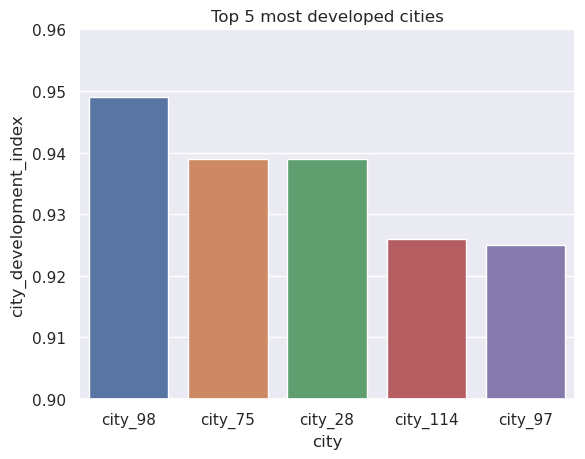

In [15]:
sns.barplot(data=sorted_city.head(5), x='city', y='city_development_index')
plt.ylim(0.9, 0.96)
plt.title("Top 5 most developed cities");

<h3 style='color:#6ac61f'> B∆∞·ªõc 2: T√¨m c√°c Data Scientists tr√™n 5 nƒÉm kinh nghi·ªám trong Top 5 th√†nh ph·ªë ph√°t tri·ªÉn nh·∫•t v√† g√°n v√†o bi·∫øn DS_developed_city</h3>

In [16]:
DS_developed_city = df[(df["city"].isin(top_5_city)) & (df['experience']>(5,))]

<h3 style='color:#6ac61f'> B∆∞·ªõc 3: T√≠nh t·ªâ l·ªá c√°c Data Scientists ·ªü tr√™n t√¨m ki·∫øm c√¥ng vi·ªác m·ªõi</h3>

T√≠nh s·ªë l∆∞·ª£ng Data Scientists t√¨m ki·∫øm c√¥ng vi·ªác m·ªõi v√† ti·∫øp t·ª•c l√†m c√¥ng vi·ªác hi·ªán t·∫°i

In [17]:
ds_target = DS_developed_city.groupby("target").size()

T√≠nh t·ªâ l·ªá ph·∫ßn trƒÉm c√°c Data Scientists ·ªü tr√™n t√¨m ki·∫øm c√¥ng vi·ªác m·ªõi

In [18]:
percentage_ds_target = ds_target / len(DS_developed_city) * 100
percentage_ds_target = percentage_ds_target.rename({0: "Kh√¥ng nh·∫£y vi·ªác", 1:"Nh·∫£y vi·ªác"})

<h3 style='color:#6ac61f'> Tr·ª±c quan h√≥a</h3>

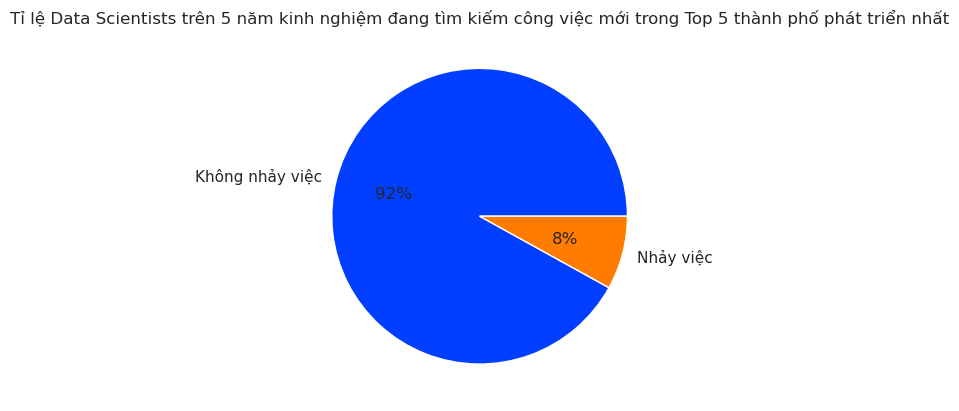

In [19]:
palette_color = sns.color_palette('bright')
labels = percentage_ds_target.index
plt.pie(percentage_ds_target,labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("T·ªâ l·ªá Data Scientists tr√™n 5 nƒÉm kinh nghi·ªám ƒëang t√¨m ki·∫øm c√¥ng vi·ªác m·ªõi trong Top 5 th√†nh ph·ªë ph√°t tri·ªÉn nh·∫•t");

<h3 style='color:#6ac61f; line-height: 1.5;'>ü§îü§îü§î T·ª´ bi·ªÉu ƒë·ªì tr√™n ·ªü t·ªâ l·ªá c√°c Data Scientists tr√™n 5 nƒÉm kinh nghi·ªám ·ªü c√°c th√†nh ph·ªë ph√°t tri·ªÉn ƒëang t√¨m ki·∫øm c√¥ng vi·ªác m·ªõi r·∫•t th·∫•p.
</h3>

<h3 style='color:red; font-size:25px'> 2 S·ªë nƒÉm kinh nghi·ªám v√† kinh nghi·ªám c√≥ li√™n quan ƒë·∫øn DS ·∫£nh h∆∞·ªüng th·∫ø n√†o ƒë·∫øn quy·∫øt ƒë·ªãnh c√≥ nh·∫£y vi·ªác kh√¥ng c·ªßa ng∆∞·ªùi tham gia ƒë√†o t·∫°o? </h3>

<h3 style='color:red; font-size:25px'> 2.1 T∆∞∆°ng quan gi·ªØa s·ªë nƒÉm kinh nghi·ªám v√† quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác </h3>

<h3 style='color:#6ac61f'> B∆∞·ªõc 1: T√≠nh ph·∫ßn trƒÉm ng∆∞·ªùi quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác so v·ªõi t·ªïng s·ªë ng∆∞·ªùi trong c√πng kho·∫£ng s·ªë nƒÉm kinh nghi·ªám </h3>

+ 1. T√≠nh s·ªë l∆∞·ª£ng ng∆∞·ªùi trong m·ªói kho·∫£ng nƒÉm kinh nghi·ªám v√†o series `experience_total`
+ 2. T√≠nh s·ªë l∆∞·ª£ng ng∆∞·ªùi c√≥ quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác v√†o series `experience_change`
+ 3. T√≠nh ph·∫ßn trƒÉm s·ªë l∆∞·ª£ng ng∆∞·ªùi quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác so v·ªõi t·ªïng s·ªë ng∆∞·ªùi trong c√πng m·ªôt kho·∫£ng s·ªë nƒÉm kinh nghi·ªám v√†o series `experience_change_percent`

In [20]:
#T√≠nh s·ªë l∆∞·ª£ng ng∆∞·ªùi trong m·ªói kho·∫£ng nƒÉm kinh nghi·ªám
experience_total = df.groupby('experience')['experience'].size()

#T√≠nh s·ªë l∆∞·ª£ng ng∆∞·ªùi c√≥ quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác
mask = df['target'] == 1 
experience_change = df[mask].groupby('experience')['experience'].size()

#T√≠nh ph·∫ßn trƒÉm 
experience_change_percent = experience_change/experience_total

experience_change_percent

experience
(0, 1)      0.496063
(1, 5)      0.296614
(6, 10)     0.209347
(11, 15)    0.136962
(16, 20)    0.101147
(21, 30)    0.077888
Name: experience, dtype: float64

<h3 style='color:#6ac61f'> B∆∞·ªõc 2: Tr·ª±c quan </h3>

Ta s·∫Ω tr·ª±c quan m·ªëi t∆∞∆°ng quan gi·ªØa s·ªë nƒÉm kinh nghi·ªám v√† quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác b·∫±ng ƒë·ªì th·ªã d·∫°ng c·ªôt, v·ªõi:
+ Tr·ª•c ho√†nh th·ªÉ hi·ªán s·ªë nƒÉm kinh nghi·ªám
+ Tr·ª•c tung th·ªÉ hi·ªán ph·∫ßn trƒÉm s·ªë ng∆∞·ªùi quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác so v·ªõi t·ªïng s·ªë ng∆∞·ªùi trong c√πng m·ªôt kho·∫£ng s·ªë nƒÉm kinh nghi·ªám

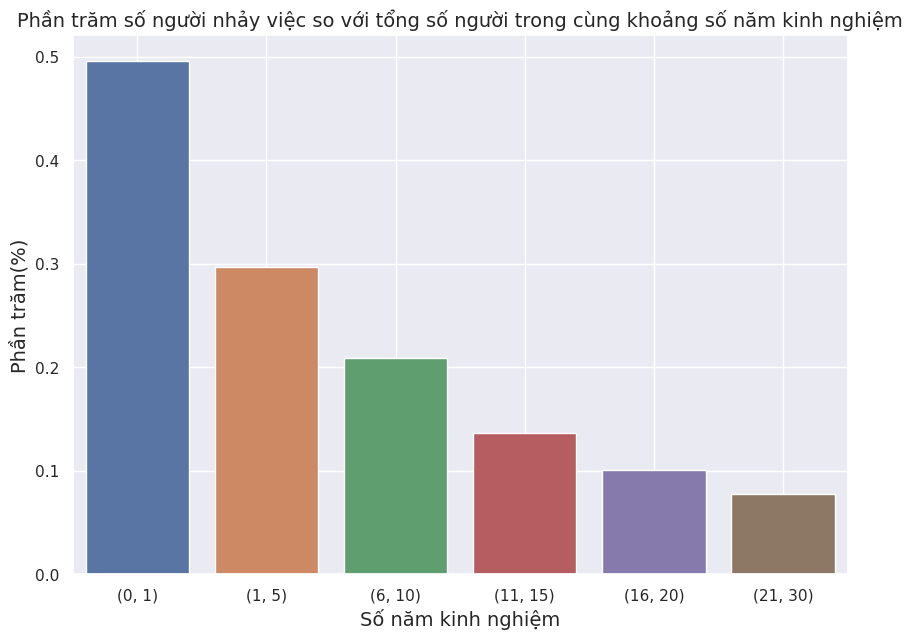

In [21]:
plt.figure(figsize=(10,7))

sns.barplot(x = experience_change_percent.index, y = experience_change_percent.values)

plt.title('Ph·∫ßn trƒÉm s·ªë ng∆∞·ªùi nh·∫£y vi·ªác so v·ªõi t·ªïng s·ªë ng∆∞·ªùi trong c√πng kho·∫£ng s·ªë nƒÉm kinh nghi·ªám', fontsize=14)
plt.xlabel('S·ªë nƒÉm kinh nghi·ªám', fontsize=14)
plt.ylabel('Ph·∫ßn trƒÉm(%)', fontsize=14)
plt.grid(True)

plt.show()

<h3 style='color:#6ac61f; line-height: 1.5;'>ü§îü§îü§î T·ª´ bi·ªÉu ƒë·ªì tr√™n ta c√≥ th·ªÉ th·∫•y m·ªôt ·ª©ng vi√™n c√≥ s·ªë nƒÉm kinh nghi·ªám c√†ng cao th√¨ kh·∫£ nƒÉng ·ª©ng vi√™n ƒë√≥ nh·∫£y vi·ªác c√†ng th·∫•p. ƒêi·ªÅu n√†y c√≥ th·ªÉ d·ª± ƒëo√°n l√† b·ªüi khi m·ªôt ng∆∞·ªùi c√≥ s·ªë nƒÉm kinh nghi·ªám v√† tu·ªïi c√†ng tƒÉng l√™n h·ªç s·∫Ω mu·ªën m·ªôt c√¥ng vi·ªác ·ªïn ƒë·ªãnh b·ªüi c∆° h·ªôi v√† kh·∫£ nƒÉng thƒÉng ti·∫øn c≈©ng gi·∫£m d·∫ßn.
</h3>

---

<h3 style='color:red; font-size:25px'> 2.2 T∆∞∆°ng quan gi·ªØa kinh nghi·ªám li√™n quan ƒë·∫øn DS v√† quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác </h3>

<h3 style='color:#6ac61f'> B∆∞·ªõc 1: T√≠nh ph·∫ßn trƒÉm nh·∫£y vi·ªác so v·ªõi t·ªïng s·ªë ng∆∞·ªùi c√≥ kinh nghi·ªám ho·∫∑c kh√¥ng c√≥ kinh nghi·ªám li√™n quan ƒë·∫øn DS </h3>

+ 1. T√≠nh s·ªë l∆∞·ª£ng ng∆∞·ªùi c√≥ kinh nghi·ªám v√† kh√¥ng c√≥ kinh nghi·ªám DS v√†o series `sr_total`
+ 2. T√≠nh s·ªë l∆∞·ª£ng ng∆∞·ªùi c√≥ quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác c√≥ kinh nghi·ªám v√† kh√¥ng c√≥ kinh nghi·ªám DS v√†o series `sr_change`
+ 3. T√≠nh ph·∫ßn trƒÉm nh·∫£y vi·ªác so v·ªõi t·ªïng s·ªë ng∆∞·ªùi c√≥ kinh nghi·ªám ho·∫∑c kh√¥ng c√≥ kinh nghi·ªám li√™n quan ƒë·∫øn DS v√†o series `sr_change_percent`

In [22]:
#T√≠nh s·ªë l∆∞·ª£ng ng∆∞·ªùi c√≥ kinh nghi·ªám v√† kh√¥ng c√≥ kinh nghi·ªám DS 
sr_total = df[['relevent_experience']].groupby('relevent_experience').size()

#T√≠nh s·ªë l∆∞·ª£ng ng∆∞·ªùi c√≥ quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác c√≥ kinh nghi·ªám v√† kh√¥ng c√≥ kinh nghi·ªám DS
mask = df['target'] == 1
sr_change = df.loc[mask,['relevent_experience']].groupby('relevent_experience').size()

#T√≠nh ph·∫ßn trƒÉm nh·∫£y vi·ªác so v·ªõi t·ªïng s·ªë ng∆∞·ªùi c√≥ kinh nghi·ªám ho·∫∑c kh√¥ng c√≥ kinh nghi·ªám li√™n quan ƒë·∫øn DS
sr_change_percent = sr_change/sr_total * 100
sr_change_percent

relevent_experience
Has relevent experience    16.374122
No relevent experience     28.534371
dtype: float64

<h3 style='color:#6ac61f'> B∆∞·ªõc 2: Tr·ª±c quan </h3>

Ta s·∫Ω tr·ª±c quan m·ªëi t∆∞∆°ng quan gi·ªØa kinh nghi·ªám li√™n quan ƒë·∫øn DS v√† quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác b·∫±ng ƒë·ªì th·ªã d·∫°ng c·ªôt, v·ªõi:
+ Tr·ª•c ho√†nh g·ªìm 2 c·ªôt `Has relevent experience` v√† `No relevent experience`
+ Tr·ª•c tung th·ªÉ hi·ªán ph·∫ßn trƒÉm

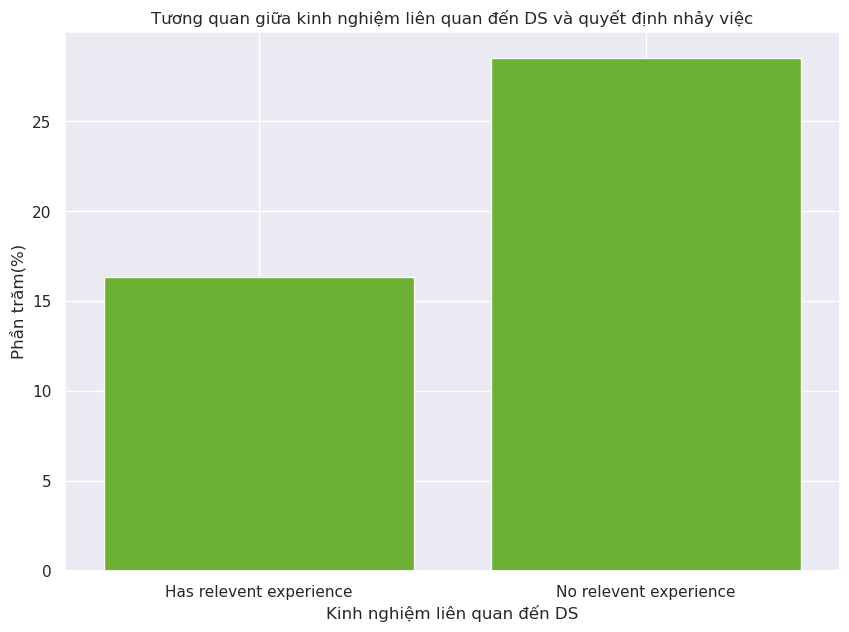

In [23]:
plt.figure(figsize=(10,7))

sns.barplot(x=sr_change_percent.index, y=sr_change_percent.values, color="#6ac61f")

plt.title('T∆∞∆°ng quan gi·ªØa kinh nghi·ªám li√™n quan ƒë·∫øn DS v√† quy·∫øt ƒë·ªãnh nh·∫£y vi·ªác', fontsize=12)
plt.xlabel('Kinh nghi·ªám li√™n quan ƒë·∫øn DS', fontsize=12)
plt.ylabel('Ph·∫ßn trƒÉm(%)', fontsize=12)
plt.grid(True)

plt.show()

<h3 style='color:#6ac61f; line-height: 1.5;'>üßêüßêüßê T·ª´ bi·ªÉu ƒë·ªì tr√™n ta c√≥ th·ªÉ th·∫•y ph·∫ßn trƒÉm nh·ªØng ng∆∞·ªùi kh√¥ng c√≥ kinh nghi·ªám li√™n quan ƒë·∫øn DS c√≥ mong mu·ªën nh·∫£y vi·ªác cao h∆°n nh·ªØng ng∆∞·ªùi c√≥ kinh nghi·ªám kho·∫£ng 10%.
</h3>

<h3 style='color:red; font-size:25px'> 3. C√≥ s·ª± ch√™nh l·ªách tr√¨nh ƒë·ªô h·ªçc v·∫•n gi·ªØa nam v√† n·ªØ hay kh√¥ng? 
ƒêi·ªÅu n√†y c√≥ ·∫£nh h∆∞·ªüng t·ªõi ch·ªâ s·ªë ph√°t tri·ªÉn c·ªßa th√†nh ph·ªë n∆°i m√† h·ªç l√†m vi·ªác? </h3>

<h3 style='color:#6ac61f'> B∆∞·ªõc 1: Th·ªëng k√™ s·ªë l∆∞·ª£ng c√°c ·ª©ng vi√™n theo gi·ªõi t√≠nh </h3>

```num_applicants_by_gender``` th·ªëng k√™ s·ªë l∆∞·ª£ng ·ª©ng vi√™n ph√¢n nh√≥m theo t·ª´ng gi·ªõi t√≠nh

In [24]:
num_applicants_by_gender = df.groupby('gender').size()
num_applicants_by_gender

gender
Female     857
Male      8572
Other       89
dtype: int64

Ta th·∫•y s·ªë l∆∞·ª£ng ·ª©ng vi√™n nam c√≥ 1 s·ª± ch√™nh l·ªách r√µ r·ªát so v·ªõi s·ªë l∆∞·ª£ng ·ª©ng vi√™n v·ªõi c√°c gi·ªõi t√≠nh kh√°c<br>
ƒê·ªÉ t√¨m hi·ªÉu s√¢u h∆°n ta ti·∫øn h√†nh th·ªëng k√™ tr√¨nh ƒë·ªô h·ªçc v·∫•n c·ªßa c√°c ·ª©ng vi√™n theo gi·ªõi t√≠nh

<h3 style='color:#6ac61f'> B∆∞·ªõc 2: Th·ªëng k√™ tr√¨nh ƒë·ªô h·ªçc v·∫•n c·ªßa c√°c ·ª©ng vi√™n theo gi·ªõi t√≠nh </h3><br>
```studies_by_gender``` s·∫Ω ph√¢n lo·∫°i tr√¨nh ƒë·ªô h·ªçc v·∫•n theo gi·ªõi t√≠nh

In [25]:
studies_by_gender = df.groupby(['gender', 'education_level']).size()
studies_by_gender

gender  education_level
Female  Graduate            571
        Masters             244
        Phd                  42
Male    Graduate           6095
        Masters            2260
        Phd                 217
Other   Graduate             73
        Masters              16
dtype: int64

<h3 style='color:#6ac61f'> B∆∞·ªõc 3: T√≠nh t·ªâ l·ªá tr√¨nh ƒë·ªô h·ªçc v·∫•n </h3>

DataFrame ```education_ratio``` g·ªìm 3 c·ªôt ·ª©ng v·ªõi gi·ªõi t√≠nh v√† 3 d√≤ng ·ª©ng v·ªõi tr√¨nh ƒë·ªô h·ªçc v·∫•n l∆∞u t·ªâ l·ªá tr√¨nh ƒë·ªô h·ªçc v·∫•n theo gi·ªõi t√≠nh (t·ª´ 0 ƒë·∫øn 100)

In [26]:
education_ratio = studies_by_gender / num_applicants_by_gender * 100
education_ratio = education_ratio.to_frame()
education_ratio = education_ratio.reset_index().pivot(index = 'education_level', columns = 'gender')
education_ratio = education_ratio.where(education_ratio.notna(), 0)
education_ratio = education_ratio[0]
education_ratio

gender              Female       Male      Other
education_level                                 
Graduate         66.627771  71.103593  82.022472
Masters          28.471412  26.364909  17.977528
Phd               4.900817   2.531498   0.000000

<h3 style='color:#6ac61f'> B∆∞·ªõc 4: Tr·ª±c quan h√≥a d·ªØ li·ªáu </h3>

Ta s·∫Ω tr·ª±c quan m·ªëi t∆∞∆°ng quan gi·ªØa tr√¨nh ƒë·ªô h·ªçc v·∫•n theo gi·ªõi t√≠nh b·∫±ng ƒë·ªì th·ªã d·∫°ng c·ªôt, v·ªõi:
+ ƒê·ªì th·ªã g·ªìm 3 c·ªôt ·ª©ng v·ªõi c√°c gi·ªõi t√≠nh
+ Tr·ª•c ho√†nh c√≥ 3 gi√° tr·ªã ·ª©ng v·ªõi tr√¨nh ƒë·ªô h·ªçc v·∫•n
+ Tr·ª•c tung th·ªÉ hi·ªán t·ªâ l·ªá ph·∫ßn trƒÉm

<AxesSubplot:xlabel='education_level'>

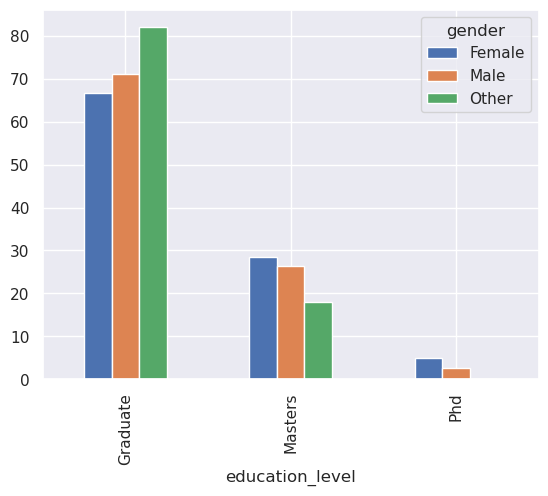

In [27]:
education_ratio.plot.bar()

Nh√¨n chung ta th·∫•y gi·ªõi t√≠nh kh√°c c√≥ t·ªâ l·ªá tr√¨nh ƒë·ªô h·ªçc v·∫•n l√† cao nh·∫•t m·∫∑c d√π c√≥ 1 s·ª± ch√™nh l·ªách l·ªõn gi·ªØa s·ªë l∆∞·ª£ng so v·ªõi nam gi·ªõi<br>
Li·ªáu c√°c ·ª©ng vi√™n n√†y c√≥ l√†m vi·ªác ·ªü c√°c th√†nh ph·ªë c√≥ m·ª©c s·ªëng cao h∆°n hay kh√¥ng?

<h3 style='color:#6ac61f'> B∆∞·ªõc 5: Tr·∫£ l·ªùi cho c√¢u h·ªèi li·ªáu tr√¨nh ƒë·ªô h·ªçc v·∫•n c√≥ ·∫£nh h∆∞·ªõng t·ªõi ch·ªâ s·ªë ph√°t tri·ªÉn c·ªßa th√†nh ph·ªë n∆°i m√† c√°c ·ª©ng vi√™n l√†m vi·ªác hay kh√¥ng </h3>

`city_development_index_mean` s·∫Ω l∆∞u gi√° tr·ªã trung b√¨nh ch·ªâ s·ªë ph√°t tri·ªÉn c·ªßa th√†nh ph·ªë theo gi·ªõi t√≠nh

In [30]:
city_development_index_mean = df.groupby(['gender']).mean()['city_development_index']
city_development_index_mean

gender
Female    0.849370
Male      0.839467
Other     0.873337
Name: city_development_index, dtype: float64

Nh∆∞ v·∫≠y, gi·ªõi t√≠nh kh√°c l√† c√°c ·ª©ng vi√™n l√†m vi·ªác ·ªü c√°c th√†nh ph·ªë c√≥ ch·ªâ s·ªë ph√°t tri·ªÉn cao nh·∫•t

--- ----

## E. T·ªïng h·ª£p l·∫°i qu√° tr√¨nh th·ª±c hi·ªán ƒë·ªì √°n